Feature matrix shape: (10000, 1)
Target vector shape: (10000,)


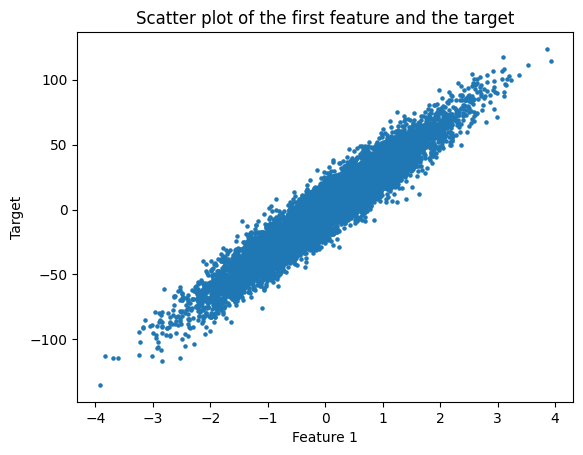

In [9]:
from sklearn.datasets import make_regression
import matplotlib.pyplot as plt

# 生成回归数据集
X, y = make_regression(n_samples=10000, n_features=1, noise=10, random_state=42)

# 打印数据集的形状
print("Feature matrix shape:", X.shape)
print("Target vector shape:", y.shape)

# 可视化部分数据点（仅可视化第一个特征和目标值）
plt.scatter(X[:, 0], y, alpha=1, s=5, marker='o')
plt.xlabel("Feature 1")
plt.ylabel("Target")
plt.title("Scatter plot of the first feature and the target")
plt.show()

In [10]:
import numpy as np

# Manualy

In [14]:
def linear_regression(X, y, learning_rate=0.1, max_iter=100, tolerance=0.0001):
    # initialize weight
    w = np.array([3, 3])
    ones_column = np.ones((X.shape[0], 1))
    X_with_ones = np.hstack((ones_column, X))

    for i in range(max_iter):
        y_hat = np.dot(X_with_ones, w)
        gradient = 2/X.shape[0] * np.dot(X_with_ones.T, y_hat-y)
        new_w = w - learning_rate * gradient
        mse = np.mean((y_hat-y)**2)
        print(f'w={w}, gradient={gradient}, new_w={new_w}, mse={mse}, iter={i}')
        w = new_w
        
    print(w)
    return w


w = linear_regression(X, y)



w=[3 3], gradient=[  5.86116345 -58.29796363], new_w=[2.41388365 8.82979636], mse=952.6401025557101, iter=0
w=[2.41388365 8.82979636], gradient=[  4.66402607 -46.55610821], new_w=[ 1.94748105 13.48540718], mse=643.9166664204415, iter=1
w=[ 1.94748105 13.48540718], gradient=[  3.71133224 -37.17919961], new_w=[ 1.57634782 17.20332714], mse=447.0440193301156, iter=2
w=[ 1.57634782 17.20332714], gradient=[  2.95318296 -29.69090848], new_w=[ 1.28102953 20.17241799], mse=321.4984530155344, iter=3
w=[ 1.28102953 20.17241799], gradient=[  2.34986251 -23.71084436], new_w=[ 1.04604328 22.54350243], mse=241.43808203745675, iter=4
w=[ 1.04604328 22.54350243], gradient=[  1.86976081 -18.93523227], new_w=[ 0.8590672  24.43702566], mse=190.38358102630897, iter=5
w=[ 0.8590672  24.43702566], gradient=[  1.48771958 -15.12148132], new_w=[ 0.71029524 25.94917379], mse=157.82610765073446, iter=6
w=[ 0.71029524 25.94917379], gradient=[  1.18371582 -12.07586145], new_w=[ 0.59192366 27.15675993], mse=137.064

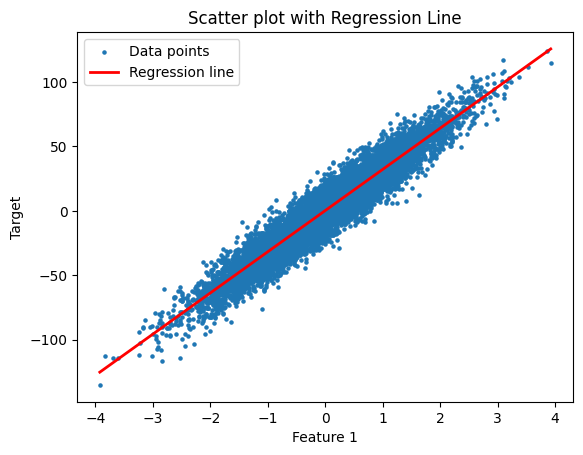

In [15]:
X_plot = np.linspace(X[:, 0].min(), X[:, 0].max(), 100).reshape(-1, 1)
X_plot_with_ones = np.hstack((np.ones((X_plot.shape[0], 1)), X_plot))
y_plot = np.dot(X_plot_with_ones, w)

# 绘制散点图
plt.scatter(X[:, 0], y, alpha=1, s=5, marker='o', label='Data points')

# 绘制回归线
plt.plot(X_plot, y_plot, color='red', linewidth=2, label='Regression line')

plt.xlabel("Feature 1")
plt.ylabel("Target")
plt.title("Scatter plot with Regression Line")
plt.legend()
plt.show()

# sklearn

w=[np.float64(0.13124399910515822), array([31.94485352])], mse=100.51996984466822


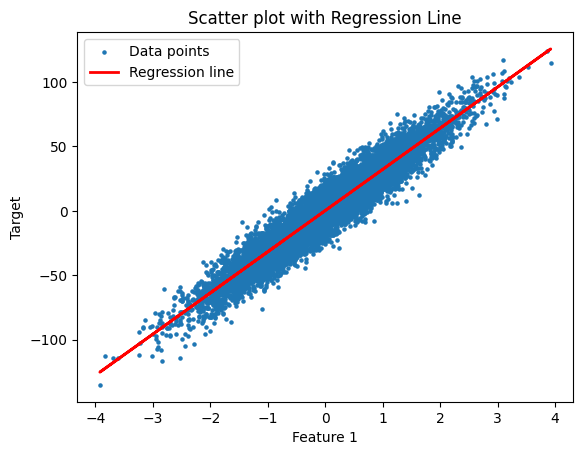

In [17]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

model = LinearRegression()
model.fit(X, y)

# 使用训练好的模型进行预测
y_hat = model.predict(X)

# 计算均方误差（MSE）
mse = mean_squared_error(y, y_hat)
print(f'w={[model.intercept_, model.coef_]}, mse={mse}')

# 绘制散点图
plt.scatter(X[:, 0], y, alpha=1, s=5, marker='o', label='Data points')

# 绘制回归线
plt.plot(X, y_hat, color='red', linewidth=2, label='Regression line')

plt.xlabel("Feature 1")
plt.ylabel("Target")
plt.title("Scatter plot with Regression Line")
plt.legend()
plt.show()